Install & Import Required Libraries

In [5]:
# Install yfinance if not already installed
#!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


 Download Historical Data

In [7]:
# Define tickers and date range
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-07-01"
end_date = "2025-07-31"

# Download full OHLCV data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Save raw data to CSV
data.to_csv("./data/financial_data_TSLA_BND_SPY_2015-2025.csv")

print("Data shape:", data.shape)


[*********************100%***********************]  3 of 3 completed

Data shape: (2535, 18)


Preview Data

In [8]:
# Example: View TSLA data
tsla_df = data["TSLA"].copy()
print(tsla_df.head())

# Check data ranges
for ticker in tickers:
    print(f"\n{ticker} Date Range:", data[ticker].index.min(), "to", data[ticker].index.max())


Price            Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-07-01  18.073999  18.174667  17.856667  17.943333  17.943333   31518000
2015-07-02  18.680000  18.830000  18.220667  18.667999  18.667999  107458500
2015-07-06  18.591999  18.779333  18.420000  18.648001  18.648001   61828500
2015-07-07  18.333332  18.346666  17.384666  17.858667  17.858667   91576500
2015-07-08  17.288000  17.386667  16.954000  16.997334  16.997334   93316500

TSLA Date Range: 2015-07-01 00:00:00 to 2025-07-30 00:00:00

BND Date Range: 2015-07-01 00:00:00 to 2025-07-30 00:00:00

SPY Date Range: 2015-07-01 00:00:00 to 2025-07-30 00:00:00


Data Cleaning & Preparation

In [9]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values using forward fill (market closed days)
data = data.ffill()

# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors="coerce")

# Check again
print("Data types:\n", data.dtypes)


Missing values:
 Ticker  Price    
TSLA    Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
BND     Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
SPY     Open         0
        High         0
        Low          0
        Close        0
        Adj Close    0
        Volume       0
dtype: int64
Data types:
 Ticker  Price    
TSLA    Open         float64
        High         float64
        Low          float64
        Close        float64
        Adj Close    float64
        Volume         int64
BND     Open         float64
        High         float64
        Low          float64
        Close        float64
        Adj Close    float64
        Volume         int64
SPY     Open         float64
        High         float64
        Low          float64
        Close        float64
        Adj Close    float64
        Volume

 Basic Statistics

In [10]:
print(data.describe().T)


                   count          mean           std           min  \
Ticker Price                                                         
TSLA   Open       2535.0  1.320006e+02  1.210342e+02  9.488000e+00   
       High       2535.0  1.349604e+02  1.237837e+02  1.033133e+01   
       Low        2535.0  1.288378e+02  1.179966e+02  9.403333e+00   
       Close      2535.0  1.319630e+02  1.209149e+02  9.578000e+00   
       Adj Close  2535.0  1.319630e+02  1.209149e+02  9.578000e+00   
       Volume     2535.0  1.141789e+08  7.332146e+07  1.062000e+07   
BND    Open       2535.0  7.964763e+01  5.372925e+00  6.808000e+01   
       High       2535.0  7.976164e+01  5.353468e+00  6.838000e+01   
       Low        2535.0  7.952570e+01  5.386081e+00  6.799000e+01   
       Close      2535.0  7.964499e+01  5.370225e+00  6.804000e+01   
       Adj Close  2535.0  6.846919e+01  4.554602e+00  6.077913e+01   
       Volume     2535.0  4.434376e+06  2.899511e+06  0.000000e+00   
SPY    Open       25

Daily Returns & Volatility

<Figure size 1000x600 with 0 Axes>

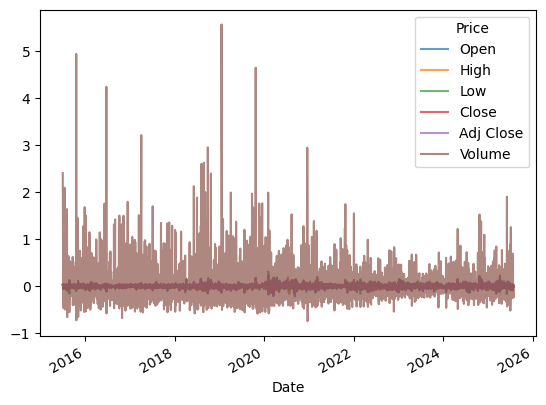

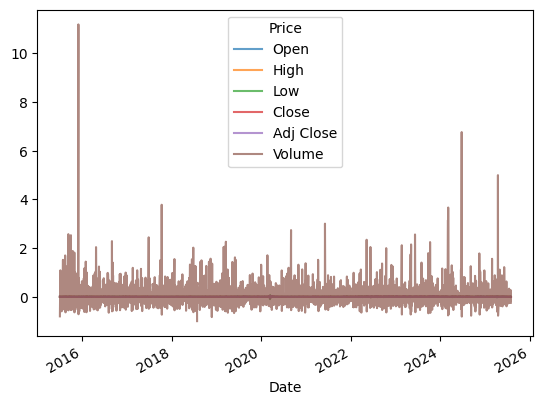

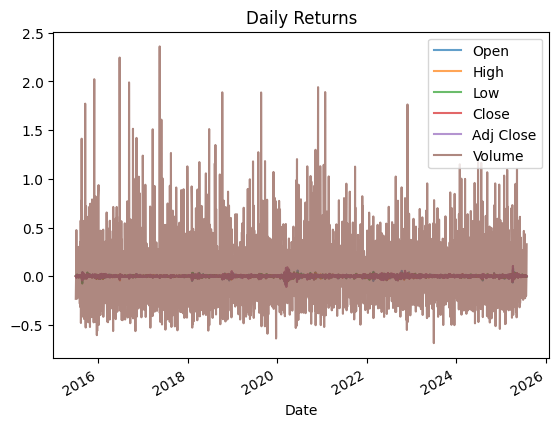

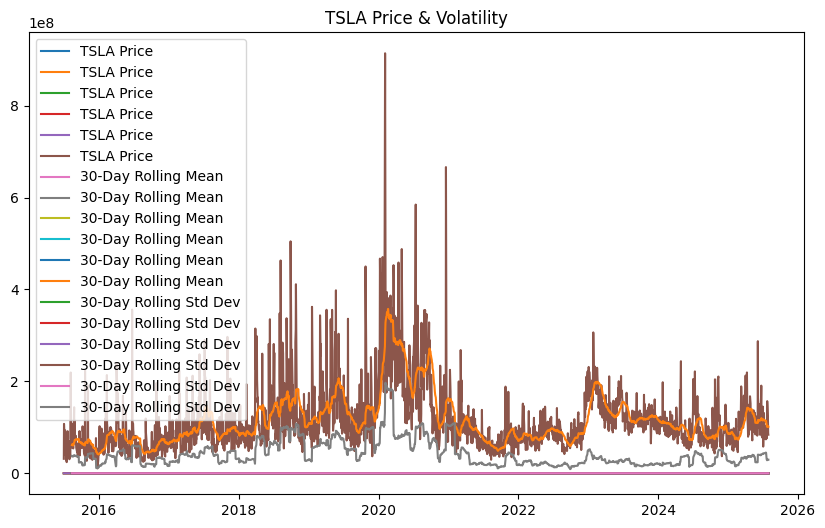

In [11]:
# Calculate daily percentage change
returns = data.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(10,6))
returns["TSLA"].plot(label="TSLA", alpha=0.7)
returns["BND"].plot(label="BND", alpha=0.7)
returns["SPY"].plot(label="SPY", alpha=0.7)
plt.title("Daily Returns")
plt.legend()
plt.show()

# Rolling mean & std for volatility
rolling_mean = data["TSLA"].rolling(window=30).mean()
rolling_std = data["TSLA"].rolling(window=30).std()

plt.figure(figsize=(10,6))
plt.plot(data["TSLA"], label="TSLA Price")
plt.plot(rolling_mean, label="30-Day Rolling Mean")
plt.plot(rolling_std, label="30-Day Rolling Std Dev")
plt.title("TSLA Price & Volatility")
plt.legend()
plt.show()


Outlier Detection

In [12]:
# Identify days with returns beyond 3 std deviations
threshold = 3 * returns.std()
outliers = returns[(returns > threshold) | (returns < -threshold)]
print("Outliers:\n", outliers.dropna(how="all"))


Outliers:
 Ticker     TSLA                                                    BND       \
Price      Open      High       Low     Close Adj Close    Volume Open High   
Date                                                                          
2015-07-02  NaN       NaN       NaN       NaN       NaN  2.409433  NaN  NaN   
2015-07-17  NaN       NaN       NaN       NaN       NaN  2.096597  NaN  NaN   
2015-08-05  NaN       NaN       NaN       NaN       NaN  1.641573  NaN  NaN   
2015-08-06  NaN       NaN       NaN       NaN       NaN  1.353250  NaN  NaN   
2015-08-19  NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN   
...         ...       ...       ...       ...       ...       ...  ...  ...   
2025-04-14  NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN   
2025-04-23  NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN   
2025-04-25  NaN  0.105225       NaN       NaN       NaN       NaN  NaN  NaN   
2025-05-12  NaN       NaN       NaN      

d:\10acadamy\server-inventory-app\W11-Time_Series_Forecasting_PMO\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Seasonality & Stationarity Test

In [14]:
# Augmented Dickey-Fuller Test for TSLA closing price
tsla_close = data["TSLA"]["Close"].dropna()
result = adfuller(tsla_close)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary; differencing is needed.")

ADF Statistic: -1.4188720053968273
p-value: 0.5731959514207222
The series is non-stationary; differencing is needed.


Risk Metrics – Value at Risk (VaR) & Sharpe Ratio

In [15]:
# Value at Risk (95%)
var_95 = returns.quantile(0.05)

# Sharpe Ratio (assuming risk-free rate ~0 for simplicity)
sharpe_ratios = (returns.mean() / returns.std()) * np.sqrt(252)

print("Value at Risk (95%):\n", var_95)
print("Sharpe Ratios:\n", sharpe_ratios)
# Save processed data
data.to_csv("./data/processed_financial_data_TSLA_BND_SPY_2015-2025.csv")
# Save returns data
returns.to_csv("./data/returns_TSLA_BND_SPY_2015-2025.csv")
# Save risk metrics
risk_metrics = pd.DataFrame({
    "VaR_95": var_95,
    "Sharpe_Ratio": sharpe_ratios
})
risk_metrics.to_csv("./data/risk_metrics_TSLA_BND_SPY_2015-2025.csv")


Value at Risk (95%):
 Ticker  Price    
TSLA    Open        -0.056886
        High        -0.048072
        Low         -0.053854
        Close       -0.054663
        Adj Close   -0.054663
        Volume      -0.402613
BND     Open        -0.004876
        High        -0.004673
        Low         -0.004822
        Close       -0.005166
        Adj Close   -0.004900
        Volume      -0.448169
SPY     Open        -0.017437
        High        -0.013477
        Low         -0.015937
        Close       -0.017392
        Adj Close   -0.017195
        Volume      -0.395154
Name: 0.05, dtype: float64
Sharpe Ratios:
 Ticker  Price    
TSLA    Open         0.769744
        High         0.802303
        Low          0.788544
        Close        0.778340
        Adj Close    0.778340
        Volume       2.331472
BND     Open        -0.162521
        High        -0.185180
        Low         -0.127398
        Close       -0.151999
        Adj Close    0.356879
        Volume            NaN

d:\10acadamy\server-inventory-app\W11-Time_Series_Forecasting_PMO\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
